# Beautiful Plots: The Lollipop
> The lollipop chart is great at visualizing differences in variables along a single axis. In this post, we create an elegant lollipop chart, in Matplotlib, to show the differences in model peformance.

As a data scientist, I am often looking for ways to explain results. It's always fun, then, when I discover a type of data visualization that I was not familiar with. Even better when the visualization solves a potential need! That's what happened when I came across the Lollipop chart -- also called a Cleveland plot, or dot plot.

I was looking to represent model peformance after having trained several classification models through [k-fold cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Essentially, I training classical ML models to detect tool wear on a CNC machine. The data set was highly imbalanced, with very few examples of worn tools. This led to a larger divergence in the results across the different k-folds. I wanted to represent this difference, and the lollipop chart was just the tool!

Here's what the original plot looks like from my thesis. (by the way, you can be one of the *few* people to read my thesis, [here](https://qspace.library.queensu.ca/handle/1974/28150). lol)

<div style="text-align: center; ">
<figure>
  <img src="./img/original_lollipop.svg" alt="original lollipop chart" style="background:none; border:none; box-shadow:none; text-align:center" width="800px"/>
</figure>
</div>

Not bad. Not bad. But this series is titled *Beautiful Plots*, so I figured I'd beautify it some more... to get this:

<div style="text-align: center; ">
<figure>
  <img src="./img/beautiful_lollipop.svg" alt="beautiful lollipop chart" style="background:none; border:none; box-shadow:none; text-align:center" width="800px"/>
</figure>
</div>

I like that plot. It's easy on the eye and draws the viewers attention to the important parts first. In the following sections I'll highlight some of the important parts of the above lollipop chart, show you how I built it in Matplotlib, and detail some of the sources of inspiration I found when creating the chart. Cheers!

# Anatomy of the Plot
I took much inspiration of the above lollipop chart from the [UC Business Analytics R Programming Guide](http://uc-r.github.io/cleveland-dot-plots), and specifically, this plot:

<div style="text-align: center; ">
<figure>
  <img src="http://uc-r.github.io/public/images/visual/cleveland-dotplots/unnamed-chunk-16-1.png" alt="cleveland dot plot" style="background:none; border:none; box-shadow:none; text-align:center" width="500px"/>
  <!-- <div style="text-align: left; "> -->
  <figcaption style="color:grey; font-size:smaller"> (Image from <a href="http://uc-r.github.io/cleveland-dot-plots">UC Business Analytics R Programming Guide</a>)</figcaption>
  <!-- </div> -->
</figure>
</div>

Here are some of the key features that were needed to build my lollipop chart:



### Scatter Points
<div style="text-align: left; ">
<figure>
  <img src="./img/scatter_points.png" alt="scatter points" style="background:none; border:none; box-shadow:none; text-align:center" width="260px"/>
</figure>
</div>

I used the standard Matplotlib `ax.scatter` to plot the scatter dots. Here's a code snip:

```ax.scatter(x=df['auc_avg'], y=df['clf_name'],s=DOT_SIZE, alpha=1, label='Average', color=lightblue, edgecolors='white')```
* The `x` and `y` are inputs from the data, in a Pandas dataframe
* A simple white "edge" around each dot adds a nice definition between the dot and the horizontal line.
* I think the color scheme is important -- it shouldn't be too jarring on the eye. I used blue color scheme which I found on this [seaborn plot](https://seaborn.pydata.org/examples/kde_ridgeplot.html). Here's the code snippet to get the hex values. 


In [1]:
import seaborn as sns
pal = sns.cubehelix_palette(6, rot=-0.25, light=0.7)
print(pal.as_hex())
pal

['#90c1c6', '#72a5b4', '#58849f', '#446485', '#324465', '#1f253f']


[[0.5632111255041908, 0.758620966612444, 0.7764634182455044],
 [0.4455043271405808, 0.645486851912866, 0.7060748939784055],
 [0.34610142033395214, 0.5188916446518053, 0.6223166076878488],
 [0.2662258106721867, 0.39203398192185646, 0.5223604305786019],
 [0.19425262671016313, 0.26573157388203594, 0.3978739334604501],
 [0.12071162840208301, 0.14526386650440642, 0.2463679091477368]]

The grey horizontal line was implemented using the Matplotlibe `ax.hlines` function.

```ax.hlines(y=df['clf_name'], xmin=df['auc_min'], xmax=df['auc_max'], color='grey', alpha=0.4, lw=4,zorder=0)```

* The grey line should be at the "back" of the chart, so set the zorder to 0.

### Leading Line
<div style="text-align: left; ">
<figure>
  <img src="./img/leading_line.png" alt="leading line" style="background:none; border:none; box-shadow:none; text-align:center" width="400px"/>
</figure>
</div>


I like how the narrow "leading line" draws the viewer's eye to the model label. Some white-space between the dots and the leading line is a nice asthetic. To get that I had to forgo gridlines. Instead, each leading line is a line plot item.

```ax.plot([df['auc_max'][i]+0.02, 0.6], [i, i], linewidth=1, color='grey', alpha=0.4, zorder=0)```

### Score Values
<div style="text-align: left; ">
<figure>
  <img src="./img/score.png" alt="score" style="background:none; border:none; box-shadow:none; text-align:center" width="56px"/>
</figure>
</div>

Placing the score, either the average, minimum, or maximum, at the dot makes it easy for the viewer to result. Generally, this is a must do for any data visualization. Don't make the reader go on a scavenger hunt trying to find what value the dot, or bar, or line, etc. corresponds to!

### Title
I found the title and chart description harder to get right than I would have thought! I wound up using Python's [textwrap module](https://docs.python.org/3/library/textwrap.html), wich is in the standard library. You learn something new every day!

For example, here is the description for the chart:

In [2]:
plt_desc = ("The top performing models in the feature engineering approach, "
"as sorted by the precision-recall area-under-curve (PR-AUC) score. "
"The average PR-AUC score for the k-folds-cross-validiation is shown, "
"along with the minimum and maximum scores in the cross-validation. The baseline"
" of a naive/random classifier is demonstated by a dotted line.")

Feeding the `plt_desc` string into the `textwrap.fill` function produces a single string, with a `\n` new line marker at every *n* characters. Let's try it: 

In [3]:
import textwrap
s=textwrap.fill(plt_desc, 90) # put a line break every 90 characters
s

'The top performing models in the feature engineering approach, as sorted by the precision-\nrecall area-under-curve (PR-AUC) score. The average PR-AUC score for the k-folds-cross-\nvalidiation is shown, along with the minimum and maximum scores in the cross-validation.\nThe baseline of a naive/random classifier is demonstated by a dotted line.'

# Putting it All Together
We have everything we need to make the lollipop chart. First, we'll import the packages we need.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

# use textwrap from python standard lib to help manage how the description 
# text shows up 
import textwrap

We'll load the cross-validation results from a csv.

We might be in a Google Colab environment, in which case, we have to download the csv data.

In [5]:
# check if the results csv exists, if not, download it
if pathlib.Path('best_results.csv').exists() == False:
    !wget 'https://raw.githubusercontent.com/tvhahn/Beautiful-Plots/master/Lollipop/best_results.csv'

In [6]:
# load best results
df = pd.read_csv('best_results.csv')
df.head()

,clf_name,auc_max,auc_min,auc_avg,auc_std
0,random_forest_classifier,0.543597,0.258770,0.405869,0.116469
1,knn_classifier,0.455862,0.315555,0.387766,0.057354
2,xgboost_classifier,0.394797,0.307394,0.348822,0.035827
3,gaussian_nb_classifier,0.412911,0.214630,0.309264,0.081198
4,ridge_classifier,0.364039,0.250909,0.309224,0.046251


In [7]:
# sort the dataframe
df = df.sort_values(by='auc_avg', ascending=True).reset_index(drop=True)
df.head()

,clf_name,auc_max,auc_min,auc_avg,auc_std
0,sgd_classifier,0.284995,0.222210,0.263574,0.029255
1,ridge_classifier,0.364039,0.250909,0.309224,0.046251
2,gaussian_nb_classifier,0.412911,0.214630,0.309264,0.081198
3,xgboost_classifier,0.394797,0.307394,0.348822,0.035827
4,knn_classifier,0.455862,0.315555,0.387766,0.057354


... and plot the chart! Hopefully there are enough comments there to help you if you're stuck.

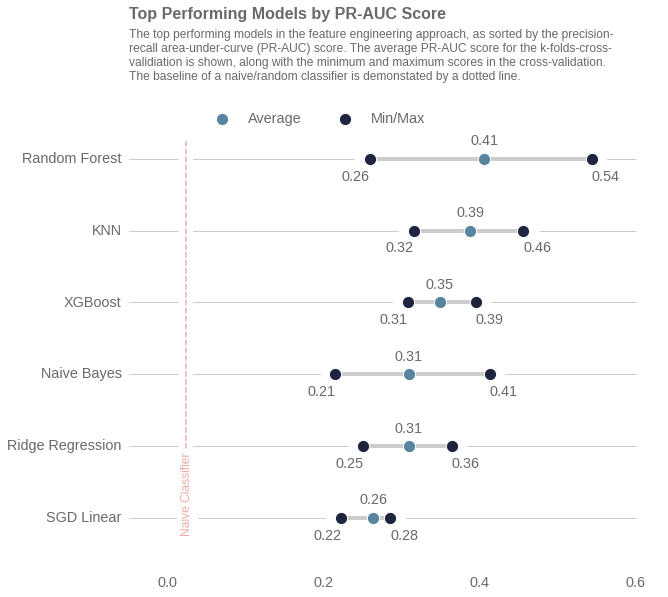

In [8]:
plt.style.use("seaborn-whitegrid")  # set style because it looks nice
fig, ax = plt.subplots(1, 1, figsize=(10, 8),)

# color palette to choose from
darkblue = "#1f253f"
lightblue = "#58849f"
redish = "#d73027"

DOT_SIZE = 150

# create the various dots
# avg dot
ax.scatter(
    x=df["auc_avg"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    label="Average",
    color=lightblue,
    edgecolors="white",
)

# min dot
ax.scatter(
    x=df["auc_min"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    label="Min/Max",
    edgecolors="white",
)

# max dot
ax.scatter(
    x=df["auc_max"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    edgecolors="white",
)

# create the horizontal line
# between min and max vals
ax.hlines(
    y=df["clf_name"],
    xmin=df["auc_min"],
    xmax=df["auc_max"],
    color="grey",
    alpha=0.4,
    lw=4, # line-width
    zorder=0, # make sure line at back
)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# plot the line that shows how a naive classifier performs
# plot two lines, one white, so that there is a gap between grid lines
# from https://stackoverflow.com/a/12731750/9214620
ax.plot([0.023, 0.023], [y_min, y_max], linestyle="-", color="white", linewidth=14)
ax.plot([0.023, 0.023], [y_min, y_max], linestyle="--", color=redish, alpha=0.4)


# dictionary used to map the column labels from df to a readable name
label_dict = {
    "sgd_classifier": "SGD Linear",
    "xgboost_classifier": "XGBoost",
    "random_forest_classifier": "Random Forest",
    "knn_classifier": "KNN",
    "gaussian_nb_classifier": "Naive Bayes",
    "ridge_classifier": "Ridge Regression",
}

# iterate through each result and apply the text
# df should already be sorted
for i in range(0, df.shape[0]):
    # avg auc score
    ax.text(
        x=df["auc_avg"][i],
        y=i + 0.15,
        s="{:.2f}".format(df["auc_avg"][i]),
        horizontalalignment="center",
        verticalalignment="bottom",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # min auc score
    ax.text(
        x=df["auc_min"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["auc_min"][i]),
        horizontalalignment="right",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # max auc score
    ax.text(
        x=df["auc_max"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["auc_max"][i]),
        horizontalalignment="left",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # add thin leading lines towards classifier names
    # to the right of max dot
    ax.plot(
        [df["auc_max"][i] + 0.02, 0.6],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )
    
    # to the left of min dot
    ax.plot(
        [-0.05, df["auc_min"][i] - 0.02],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )

    # add classifier name text
    clf_name = label_dict[df["clf_name"][i]]
    ax.text(
        x=-0.059,
        y=i,
        s=clf_name,
        horizontalalignment="right",
        verticalalignment="center",
        size="x-large",
        color="dimgrey",
        weight="normal",
    )


# add text for the naive classifier
ax.text(
    x=0.023 + 0.01,
    y=(y_min),
    s="Naive Classifier",
    horizontalalignment="right",
    verticalalignment="bottom",
    size="large",
    color=redish,
    rotation="vertical",
    backgroundcolor="white",
    alpha=0.4,
)

# remove the y ticks
ax.set_yticks([])

# drop the gridlines (inherited from 'seaborn-whitegrid' style)
# and drop all the spines
ax.grid(False)  
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# custom set the xticks since this looks better
ax.set_xticks([0.0, 0.2, 0.4, 0.6])

# set properties of xtick labels
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
ax.tick_params(axis="x", pad=20, labelsize="x-large", labelcolor="dimgrey")

# Add plot title and then description underneath it
plt_title = "Top Performing Models by PR-AUC Score"

plt_desc = (
    "The top performing models in the feature engineering approach, "
    "as sorted by the precision-recall area-under-curve (PR-AUC) score. "
    "The average PR-AUC score for the k-folds-cross-validiation is shown, "
    "along with the minimum and maximum scores in the cross-validation. The baseline"
    " of a naive/random classifier is demonstated by a dotted line."
)

# set the plot description
# use the textwrap.fill (from textwrap std. lib.) to
# get the text to wrap after a certain number of characters
PLT_DESC_LOC = 6.8
ax.text(
    x=-0.05,
    y=PLT_DESC_LOC,
    s=textwrap.fill(plt_desc, 90),
    horizontalalignment="left",
    verticalalignment="top",
    size="large",
    color="dimgrey",
    weight="normal",
    wrap=True,
)

ax.text(
    x=-0.05,
    y=PLT_DESC_LOC + 0.1,
    s=plt_title,
    horizontalalignment="left",
    verticalalignment="bottom",
    size=16,
    color="dimgrey",
    weight="semibold",
    wrap=True,
)

# create legend
ax.legend(
    frameon=False,
    bbox_to_anchor=(0.6, 1.05),
    ncol=2,
    fontsize="x-large",
    labelcolor="dimgrey",
)

# plt.savefig('best_results.svg',dpi=150, bbox_inches = "tight")
plt.show()

# More Inspiration
I've found a couple other good example of lollipop charts, with code, that you might find interesting too. Let me know if you find other good examples (tweet or DM me at @timothyvh) and I'll add them to the list.

* This lollipop chart is from [Graipher on StackExchange](https://stats.stackexchange.com/a/423861).

<div style="text-align: left; ">
<figure>
  <img src="./img/energy_prod.svg" alt="energy production dot plot" style="background:none; border:none; box-shadow:none; text-align:center" width="800px"/>
</figure>
</div>

* Pierre Haessig has a great [blog post](https://pierreh.eu/tag/matplotlib/) where he creates dot plots to visualize French power system data over time. The Jupyter Notebooks are on his github, [here](https://github.com/pierre-haessig/french-elec2/blob/master/Dotplots_Powersys.ipynb).

<div style="text-align: left; ">
<figure>
  <img src="https://pierreh.eu/wp-content/uploads/Dotplot_Powersys_2018_bymax-1024x708.png" alt="French power system data" style="background:none; border:none; box-shadow:none; text-align:center" width="800px"/>
</figure>
</div>